## Temperature and salinity covariates

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import nbconvert
import netCDF4 as nc4
import itertools
# import statsmodels.api as sm

In [15]:
# open Sverdrup 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
sverdrup_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_L3.nc")
sverdrup_ds.close()

In [16]:
# open Rink 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink_1D_L3.nc")
rink_ds.close()

In [17]:
# open Fisher Islands 2020 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
fisher_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_Fisher_1D_L3.nc')
fisher_ds.close()

In [18]:
# open Kong Oscar 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
kongoscar19 = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar2019_1D_L3.nc")
kongoscar19.close()

In [19]:
# open Kong Oscar 2020 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
kongoscar20 = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_KongOscar2020_1D_L3.nc')
kongoscar20.close()

In [27]:
def plot_mooring_profile_kongoscar(kongoscar19, kongoscar20):
    temp19 = kongoscar19['temperature']
    density19 = kongoscar19['density']
    salt19 = kongoscar19['salinity']
    
    temp20 = kongoscar20['temperature']
    density20 = kongoscar20['density']
    salt20 = kongoscar20['salinity']
    
    # define a set of depths to interpolate to. Here 100 points between the min and max depths in the KO data for both years of data.
    interpolation_depths = np.linspace(94, 257.5, 1000) # min and max depths for 2019 and 2020 mooring data
    
    ## depth correction for 2019 Kong Oscar data
    ## temperature dataArray -----------------------------------------------------------------------------------------------------------------
    # drag 1
    temp_drag1 = temp19.sel(time = slice('2018-08-28','2018-09-01')) 
    temp_drag1 = temp_drag1.assign_coords(Depth_temp=(temp_drag1.Depth_temp - 7.25)) # correct depth to reflect correct placement of instruments
    temp_drag1_at_interpolation_depths = temp_drag1.interp(Depth_temp=interpolation_depths)
    
    # drag 2
    temp_drag2 = temp19.sel(time = slice('2018-09-02','2018-09-07')) 
    temp_drag2 = temp_drag2.assign_coords(Depth_temp=(temp_drag2.Depth_temp - 3.7)) # correct depth to reflect correct placement of instruments
    temp_drag2_at_interpolation_depths = temp_drag2.interp(Depth_temp=interpolation_depths)
    
    # drag 3
    temp_drag3 = temp19.sel(time = slice('2018-09-08','2018-10-12')) 
    temp_drag3 = temp_drag3.assign_coords(Depth_temp=(temp_drag3.Depth_temp - 8.7)) # correct depth to reflect shallower placement of instruments
    temp_drag3_at_interpolation_depths = temp_drag3.interp(Depth_temp=interpolation_depths)
    
    # drag 4
    temp_drag4 = temp19.sel(time = slice('2019-07-29','2019-08-01')) # last 4 days where mooring was deeper
    temp_drag4 = temp_drag4.assign_coords(Depth_temp=(temp_drag4.Depth_temp + 17.5)) # correct depth to reflect deeper placement of instruments
    temp_drag4_at_interpolation_depths = temp_drag4.interp(Depth_temp=interpolation_depths)
    
    ## density dataArray -----------------------------------------------------------------------------------------------------------------
    # drag 1
    density_drag1 = density19.sel(time = slice('2018-08-28','2018-09-01')) 
    density_drag1 = density_drag1.assign_coords(Depth_CTD=(density_drag1.Depth_CTD - 7.25)) # correct depth to reflect correct placement of instruments
    density_drag1_at_interpolation_depths = density_drag1.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    
    # drag 2
    density_drag2 = density19.sel(time = slice('2018-09-02','2018-09-07')) 
    density_drag2 = density_drag2.assign_coords(Depth_CTD=(density_drag2.Depth_CTD - 3.7)) # correct depth to reflect correct placement of instruments
    density_drag2_at_interpolation_depths = density_drag2.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    
    # drag 3
    density_drag3 = density19.sel(time = slice('2018-09-08','2018-10-12')) 
    density_drag3 = density_drag3.assign_coords(Depth_CTD=(density_drag3.Depth_CTD - 8.7)) # correct depth to reflect shallower placement of instruments
    density_drag3_at_interpolation_depths = density_drag3.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    
    # drag 4
    density_drag4 = density19.sel(time = slice('2019-07-29','2019-08-01')) # last 4 days where mooring was deeper
    density_drag4 = density_drag4.assign_coords(Depth_CTD=(density_drag4.Depth_CTD + 17.5)) # correct depth to reflect deeper placement of instruments
    density_drag4_at_interpolation_depths = density_drag4.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    
    ## salinity dataArray -----------------------------------------------------------------------------------------------------------------
    # drag 1
    salt_drag1 = salt19.sel(time = slice('2018-08-28','2018-09-01')) 
    salt_drag1 = salt_drag1.assign_coords(Depth_CTD=(salt_drag1.Depth_CTD - 7.25)) # correct depth to reflect correct placement of instruments
    salt_drag1_at_interpolation_depths = salt_drag1.interp(Depth_CTD=interpolation_depths)
    
    # drag 2
    salt_drag2 = salt19.sel(time = slice('2018-09-02','2018-09-07')) 
    salt_drag2 = salt_drag2.assign_coords(Depth_CTD=(salt_drag2.Depth_CTD - 3.7)) # correct depth to reflect correct placement of instruments
    salt_drag2_at_interpolation_depths = salt_drag2.interp(Depth_CTD=interpolation_depths)
    
    # drag 3
    salt_drag3 = salt19.sel(time = slice('2018-09-08','2018-10-12')) 
    salt_drag3 = salt_drag3.assign_coords(Depth_CTD=(salt_drag3.Depth_CTD - 8.7)) # correct depth to reflect shallower placement of instruments
    salt_drag3_at_interpolation_depths = salt_drag3.interp(Depth_CTD=interpolation_depths)
    
    # drag 4
    salt_drag4 = salt19.sel(time = slice('2019-07-29','2019-08-01')) # last 4 days where mooring was deeper
    salt_drag4 = salt_drag4.assign_coords(Depth_CTD=(salt_drag4.Depth_CTD + 17.5)) # correct depth to reflect deeper placement of instruments
    salt_drag4_at_interpolation_depths = salt_drag4.interp(Depth_CTD=interpolation_depths)
    
    # interpolate data for the timeseries where the mooring was stable --------------------
    temp_middle = temp19.sel(time = slice('2018-10-13','2019-07-28')) # time in between summer dragging events when mooring was stable
    temp_middle_at_interpolation_depths = temp_middle.interp(Depth_temp=interpolation_depths)
    
    density_middle = density19.sel(time = slice('2018-10-13','2019-07-28')) # time in between summer dragging events when mooring was stable
    density_middle_at_interpolation_depths = density_middle.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    
    salt_middle = salt19.sel(time = slice('2018-10-13','2019-07-28')) # time in between summer dragging events when mooring was stable
    salt_middle_at_interpolation_depths = salt_middle.interp(Depth_CTD=interpolation_depths)
    
    ## interpolate data for the 2020 mooring at the same interpolation depths used for the 2019 mooring above
    temp20_at_interpolation_depths = temp20.interp(Depth_temp=interpolation_depths)
    density20_at_interpolation_depths = density20.interp(Depth_CTD=interpolation_depths) - 1000 # subtract 1000 from density values
    salt20_at_interpolation_depths = salt20.interp(Depth_CTD=interpolation_depths)
    
    # make a new DataArrays for gap between 2019 and 2020 moorings due to recovery and redeployment days
    deployment_gap_times = np.array(['2019-08-02','2019-08-03','2019-08-04','2019-08-05'], dtype = 'datetime64')
    
    temp_DA_fill = xr.DataArray(np.nan, dims=['Depth_temp','time'],\
                               coords={'Depth_temp': interpolation_depths,\
                                       'time': deployment_gap_times})
    
    # make a new DataArray, 
    salt_DA_fill = xr.DataArray(np.nan, dims=['Depth_CTD','time'],\
                               coords={'Depth_CTD': interpolation_depths,\
                                       'time': deployment_gap_times})
    
    # make a new DataArray, 
    density_DA_fill = xr.DataArray(np.nan, dims=['Depth_CTD','time'],\
                               coords={'Depth_CTD': interpolation_depths,\
                                       'time': deployment_gap_times})
    
    ## put together final DataArrays
    temp_correction_2018_2020 = xr.concat([temp_drag1_at_interpolation_depths, temp_drag2_at_interpolation_depths, 
                                           temp_drag3_at_interpolation_depths, temp_middle_at_interpolation_depths, 
                                           temp_drag4_at_interpolation_depths, temp_DA_fill, temp20_at_interpolation_depths], 
                                          dim = 'time', coords='minimal', compat='override')
    
    density_correction_2018_2020 = xr.concat([density_drag1_at_interpolation_depths, density_drag2_at_interpolation_depths, 
                                              density_drag3_at_interpolation_depths, density_middle_at_interpolation_depths, 
                                              density_drag4_at_interpolation_depths, density_DA_fill, density20_at_interpolation_depths], 
                                             dim = 'time', coords='minimal', compat='override')
    
    salt_correction_2018_2020 = xr.concat([salt_drag1_at_interpolation_depths, salt_drag2_at_interpolation_depths, 
                                           salt_drag3_at_interpolation_depths, salt_middle_at_interpolation_depths, 
                                           salt_drag4_at_interpolation_depths, salt_DA_fill, salt20_at_interpolation_depths], 
                                          dim = 'time', coords='minimal', compat='override')
    
    # PLOT --------------------------------------------------------------------
    plt.rcParams['font.size'] = '16'
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=[21,8])
    
    abbreviations = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A','S','O','N','D',"J '20",'F','M','A','M','J','J','A']
    months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
    
    sensor_depths_temp_2019 = pd.DataFrame({'Date':list(itertools.repeat(temp19.time[-5].values, len(temp19.Depth_temp))),'Depth':temp19.Depth_temp.values})
    sensor_depths_temp_2020 = pd.DataFrame({'Date':list(itertools.repeat(temp20.time[-1].values, len(temp20.Depth_temp))),'Depth':temp20.Depth_temp.values})
    sensor_depths_salt_2019 = pd.DataFrame({'Date':list(itertools.repeat(salt19.time[-5].values, len(salt19.Depth_CTD))),'Depth':salt19.Depth_CTD.values})
    sensor_depths_salt_2020 = pd.DataFrame({'Date':list(itertools.repeat(salt20.time[-1].values, len(salt20.Depth_CTD))),'Depth':salt20.Depth_CTD.values})
    
    # no contour
    # temp_correction_2018_2020.plot(ax=ax1, cmap='RdYlBu_r',vmin=-0.6, vmax=1.2, cbar_kwargs={'pad':0.02,'label':'Temperature (°C)'})
    # salt_correction_2018_2020.plot(ax=ax2,cmap=cmocean.cm.haline, vmin=33.2, vmax=34.1, cbar_kwargs={'pad':0.02,'label':'Salinity (PSU)'})
    
    # contour
    # levels_temp=np.arange(-0.6,1.2,0.05)
    # levels_salt=np.arange(33.2,34.1,0.05)
    
    # for all the same temp/salinity scales between all mooring plots:
    levels_temp=np.arange(-0.5,2,0.05)
    levels_salt=np.arange(33.5,34.3,0.05)
    
    temp_correction_2018_2020.plot.contourf(ax=ax1, cmap='RdYlBu_r',levels=levels_temp, cbar_kwargs={'pad':0.02,'label':'Temperature (°C)'})
    salt_correction_2018_2020.plot.contourf(ax=ax2,cmap=cmocean.cm.haline, levels=levels_salt, cbar_kwargs={'pad':0.02,'label':'Salinity (PSU)'})
    
    # density contour lines
    ax1.clabel(density_correction_2018_2020.plot.contour(ax=ax1,colors='black', linewidths=1), inline=True, fontsize=14)
    ax2.clabel(density_correction_2018_2020.plot.contour(ax=ax2,colors='black', linewidths=1), inline=True, fontsize=14)
    
    ax1.set_title(str('Kong Oscar' + ' (Absolute)'))
    ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax1.set_ylabel("Depth (m)")
    ax1.set_xlabel("")
    ax1.xaxis.set_ticklabels([])
    ax1.invert_yaxis()
    
    ax2.set_title("")
    ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax2.set_ylabel("Depth (m)")
    ax2.set_xlabel("Month")
    ax2.invert_yaxis()
    
    # plot where sensors are located at end of timeseries
    ax1.plot(sensor_depths_temp_2019.Date, sensor_depths_temp_2019.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt_2019.Date, sensor_depths_salt_2019.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ax1.plot(sensor_depths_temp_2020.Date, sensor_depths_temp_2020.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt_2020.Date, sensor_depths_salt_2020.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ## save figure 
    # plt.savefig('figures/profiles/'+'KO'+'_profile_absolute_contour.png', bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    # PLOT ANOMALY ----------------------------------------------------------
    temp_anomaly = temp_correction_2018_2020 - temp_correction_2018_2020.mean()
    salt_anomaly = salt_correction_2018_2020 - salt_correction_2018_2020.mean()
    
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=[21,8])
    # no contour
    # temp_anomaly.plot(ax=ax1, cmap="coolwarm", cbar_kwargs={'pad':0.02,'label':'Temperature anomaly (°C)'})
    # salt_anomaly.plot(ax=ax2, cmap="coolwarm", cbar_kwargs={'pad':0.02,'label':'Salinity anomaly (PSU)'})
    
    # contour plot
    # levels=np.arange(-0.8,0.8,0.05)
    
    # for all the same colorbar scales between mooring plots:
    levels_temp=np.arange(-1,1,0.05)
    levels_salt=np.arange(-0.5,0.5,0.05)
    
    temp_anomaly.plot.contourf(ax=ax1, cmap="coolwarm", levels=levels_temp, cbar_kwargs={'pad':0.02,'label':'Temperature anomaly (°C)'})
    salt_anomaly.plot.contourf(ax=ax2, cmap="coolwarm", levels=levels_salt, cbar_kwargs={'pad':0.02,'label':'Salinity anomaly (PSU)'})
    
    ax1.clabel(density_correction_2018_2020.plot.contour(ax=ax1,colors='black', linewidths=1), inline=True, fontsize=14)
    ax2.clabel(density_correction_2018_2020.plot.contour(ax=ax2,colors='black', linewidths=1), inline=True, fontsize=14)
    
    ax1.set_title(str('Kong Oscar' + ' (Anomaly)'))
    ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax1.set_ylabel("Depth (m)")
    ax1.set_xlabel("")
    ax1.xaxis.set_ticklabels([])
    ax1.invert_yaxis()
    
    ax2.set_title("")
    ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax2.set_ylabel("Depth (m)")
    ax2.set_xlabel("Month")
    ax2.invert_yaxis()
    
    # plot where sensors are located at end of timeseries
    ax1.plot(sensor_depths_temp_2019.Date, sensor_depths_temp_2019.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt_2019.Date, sensor_depths_salt_2019.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ax1.plot(sensor_depths_temp_2020.Date, sensor_depths_temp_2020.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt_2020.Date, sensor_depths_salt_2020.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ## save figure
    # plt.savefig('figures/profiles/'+'KO'+'_profile_anomaly_contour.png', bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    # lastly, rename 'Depth_temp' and 'Depth_CTD' to just 'depth' to be consistent with other mooring datasets
    KO_temp_da_interp = temp_correction_2018_2020.rename(Depth_temp='depth')
    KO_salt_da_interp = salt_correction_2018_2020.rename(Depth_CTD='depth')
    
    return KO_temp_da_interp, KO_salt_da_interp

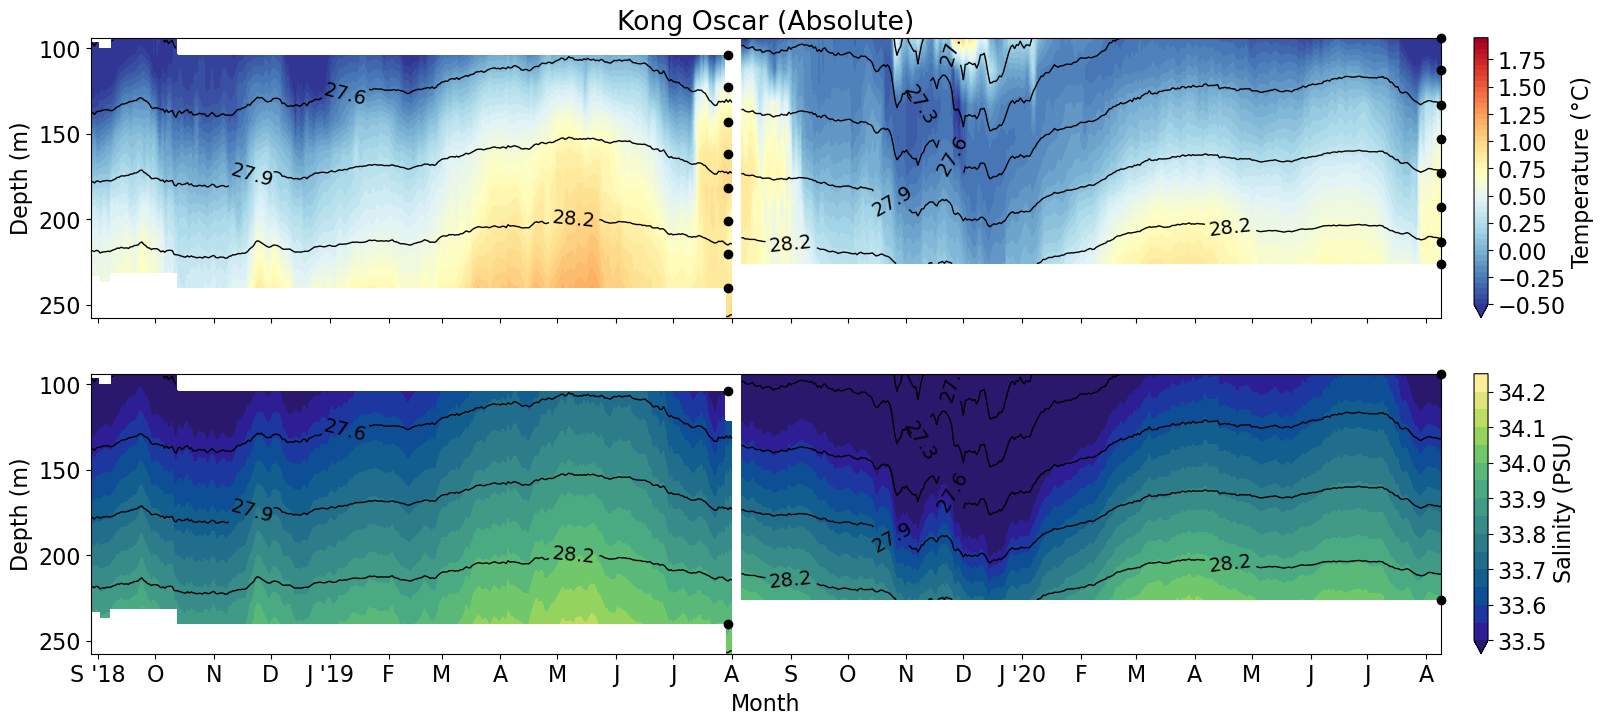

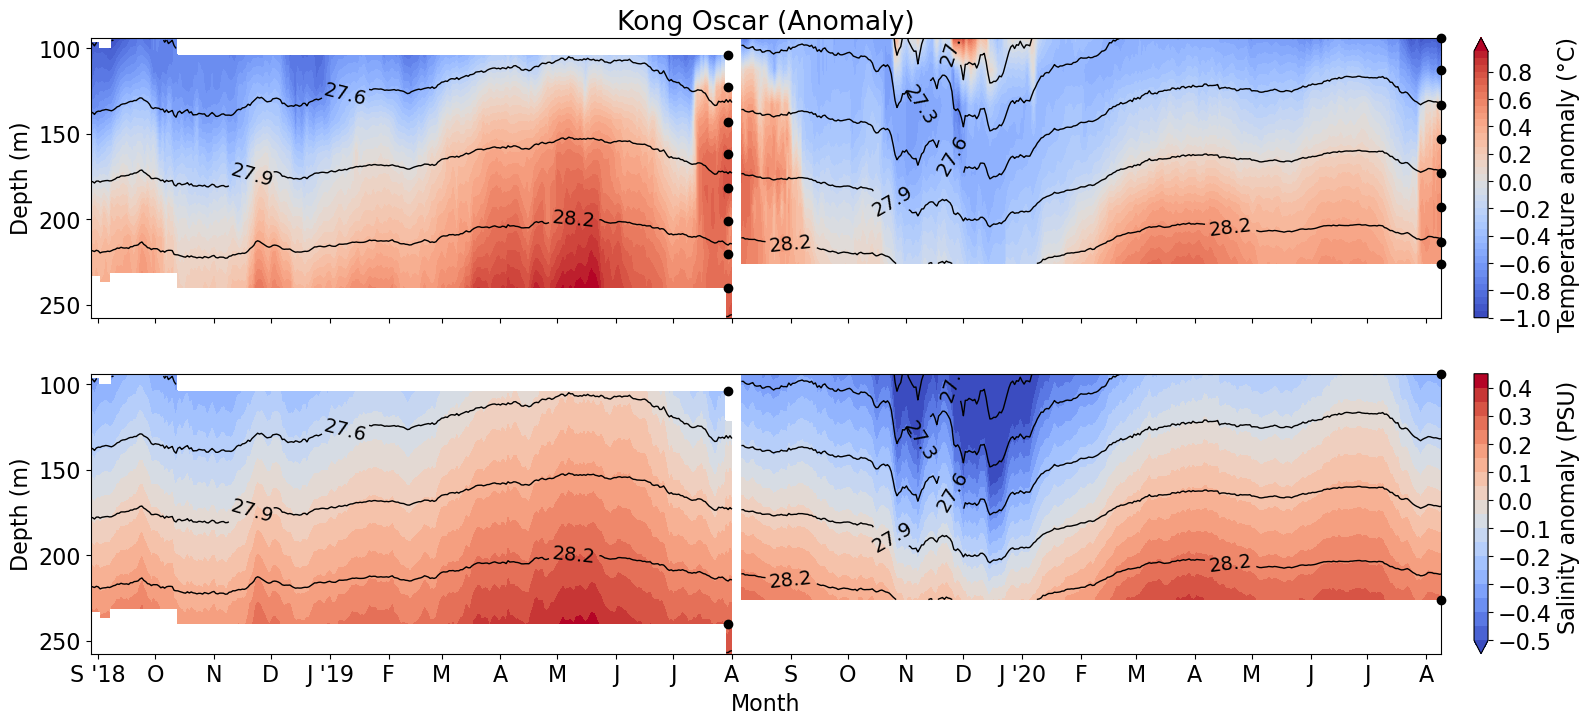

In [28]:
KO_temp_da_interp, KO_salt_da_interp = plot_mooring_profile_kongoscar(kongoscar19, kongoscar20)

In [29]:
def plot_mooring_profile(data_ds, fjord_name='Rink'):
    # extract DataArrays
    temp = data_ds['temperature']
    salt = data_ds['salinity']
    density = data_ds['density']
    
    # define a set of depths to interpolate to.  here 100 points between the min and max depths in the data.
    interpolation_depths = np.linspace(temp.Depth_temp.min(), temp.Depth_temp.max(), 1000)
    
    # make a new DataArray, use 'depth' as one of the dimensions instead of the serial number
    temp_DA_new = xr.DataArray(temp.values, dims=['depth','time'],\
                               coords={'depth': temp.Depth_temp.values,\
                                       'time': temp.time.values})
    
    # make a new DataArray, use 'depth' as one of the dimensions instead of the serial number
    salt_DA_new = xr.DataArray(salt.values, dims=['depth','time'],\
                               coords={'depth': salt.Depth_CTD.values,\
                                       'time': salt.time.values})
    
    # make a new DataArray, use 'density' as one of the dimensions instead of the serial number
    density_DA_new = xr.DataArray(density.values, dims=['depth','time'],\
                               coords={'depth': density.Depth_CTD.values,\
                                       'time': density.time.values})
    
    temp_da_new_at_interpolation_depths = temp_DA_new.interp(depth=interpolation_depths)
    salt_da_new_at_interpolation_depths = salt_DA_new.interp(depth=interpolation_depths)
    density_da_new_at_interpolation_depths = density_DA_new.interp(depth=interpolation_depths) - 1000 # subtract 1000 from density values
    
    # FILL VALUES FOR RINK
    if fjord_name=='Rink':
        # fill in values of upper temp sensor ------------------------------------
        temp_DA_new_tmp = temp_da_new_at_interpolation_depths.bfill(dim='depth', limit=5) # fill in some valued from deeper sensor on mooring
    
        # substitute ones for the nans in the data for the short profile
        interp_short_zeros = np.where(temp_DA_new_tmp.values!=np.nan,0,1) # create mask for 'short' interpolation
        interp_short_mask = (temp_DA_new_tmp*interp_short_zeros).fillna(1) 
        # fill values using deeper CTD cast for pair of profiles and create 'long' interpolation profile
        temp_DA_new_filled = temp_DA_new.ffill(dim='depth')
        temp_DA_new_filled_at_interpolation_depths = temp_DA_new_filled.interp(depth=interpolation_depths)
        
        # isolate deeper section of the 'long' profile, reduce its length (distance), and combine to short profile
        chunk = (temp_DA_new_filled_at_interpolation_depths*interp_short_mask).where((temp_DA_new_filled_at_interpolation_depths*interp_short_mask)!=0, np.nan)
        
        # extract just upper 20 m of profile
        chunk_select = chunk.sel(depth=slice(70,100))
        
        # # assign tmp to final output DataArray
        temp_da_new_at_interpolation_depths = temp_DA_new_tmp.combine_first(chunk_select)
  
    # pull out depths at which each sensor was located on the mooring
    sensor_depths_temp = pd.DataFrame({'Date':list(itertools.repeat(data_ds.time[-1].values, len(data_ds.Depth_temp))),'Depth':data_ds.Depth_temp.values})
    sensor_depths_salt = pd.DataFrame({'Date':list(itertools.repeat(data_ds.time[-1].values, len(data_ds.Depth_CTD))),'Depth':data_ds.Depth_CTD.values})
    
    # PLOT --------------------------------------------------------------------
    plt.rcParams['font.size'] = '16'
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=[18,8])
    
    if fjord_name=='Rink':
        abbreviations = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A']
        months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
        temp_da_new_at_interpolation_depths.plot(ax=ax1, cmap='RdYlBu_r', vmin=-0.5, vmax=2.2, cbar_kwargs={'pad':0.02,'label':'Temperature (°C)'})
        salt_da_new_at_interpolation_depths.plot(ax=ax2,cmap=cmocean.cm.haline, vmin=33.5, vmax=34.3, cbar_kwargs={'pad':0.02,'label':'Salinity (PSU)'})
        # ax1.set_ylim(400, temp_da_new_at_interpolation_depths.depth.min()) # to zoom in for rink plot (upper ocean)
        # ax2.set_ylim(400, temp_da_new_at_interpolation_depths.depth.min())
    elif fjord_name=='Fisher':
        abbreviations = ["S '19","O",'N','D',"J '20",'F','M','A','M','J','J','A']
        months = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
        temp_da_new_at_interpolation_depths.plot(ax=ax1, cmap='RdYlBu_r', vmin=-0.5, vmax=1.8, cbar_kwargs={'pad':0.02,'label':'Temperature (°C)'})
        salt_da_new_at_interpolation_depths.plot(ax=ax2,cmap=cmocean.cm.haline, vmin=33.5, vmax=34.3, cbar_kwargs={'pad':0.02,'label':'Salinity (PSU)'})
    elif fjord_name=='Sverdrup':
        abbreviations = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A']
        months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
        temp_da_new_at_interpolation_depths.plot(ax=ax1, cmap='RdYlBu_r',vmin=-0.5,vmax=1.5, cbar_kwargs={'pad':0.02,'label':'Temperature (°C)'})
        salt_da_new_at_interpolation_depths.plot(ax=ax2,cmap=cmocean.cm.haline, vmin=33.5, vmax=34.3, cbar_kwargs={'pad':0.02,'label':'Salinity (PSU)'})
        # # Kong Oscar 2018-2019
        # abbreviations = ["S '18","O",'N','D',"J '19",'F','M','A','M','J','J','A','S','O','N','D',"J '20",'F','M','A','M','J','J','A']
        # months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
    
    # density contour lines
    ax1.clabel(density_da_new_at_interpolation_depths.plot.contour(ax=ax1,colors='black', linewidths=1), inline=True, fontsize=14)
    ax2.clabel(density_da_new_at_interpolation_depths.plot.contour(ax=ax2,colors='black', linewidths=1), inline=True, fontsize=14)

    ax1.set_title(str(fjord_name + ' (Absolute)'))
    ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax1.set_ylabel("Depth (m)")
    ax1.set_xlabel("")
    ax1.xaxis.set_ticklabels([])
    ax1.invert_yaxis()
    
    ax2.set_title("")
    ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax2.set_ylabel("Depth (m)")
    ax2.set_xlabel("Month")
    ax2.invert_yaxis()
    
    # plot where sensors are located at end of timeseries
    ax1.plot(sensor_depths_temp.Date, sensor_depths_temp.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt.Date, sensor_depths_salt.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ## save figure 
    # plt.savefig('figures/profiles/'+fjord_name+'_profile_absolute.png', bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    # PLOT ANOMALY ----------------------------------------------------------
    temp_anomaly = temp_da_new_at_interpolation_depths - temp_da_new_at_interpolation_depths.mean()
    salt_anomaly = salt_da_new_at_interpolation_depths - salt_da_new_at_interpolation_depths.mean()

    fig, (ax1,ax2) = plt.subplots(2,1, figsize=[18,8])
    temp_anomaly.plot(ax=ax1, cmap="coolwarm", cbar_kwargs={'pad':0.02,'label':'Temperature anomaly (°C)'})
    salt_anomaly.plot(ax=ax2, cmap="coolwarm", cbar_kwargs={'pad':0.02,'label':'Salinity anomaly (PSU)'})
    
    # # for zoomed in Rink profile
    # ax1.set_ylim(400, temp_da_new_at_interpolation_depths.depth.min())
    # ax2.set_ylim(400, temp_da_new_at_interpolation_depths.depth.min())
    
    ax1.clabel(density_da_new_at_interpolation_depths.plot.contour(ax=ax1,colors='black', linewidths=1), inline=True, fontsize=14)
    ax2.clabel(density_da_new_at_interpolation_depths.plot.contour(ax=ax2,colors='black', linewidths=1), inline=True, fontsize=14)

    ax1.set_title(str(fjord_name + ' (Anomaly)'))
    ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax1.set_ylabel("Depth (m)")
    ax1.set_xlabel("")
    ax1.xaxis.set_ticklabels([])
    ax1.invert_yaxis()
    
    ax2.set_title("")
    ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
    ax2.set_ylabel("Depth (m)")
    ax2.set_xlabel("Month")
    ax2.invert_yaxis()
    
    # plot where sensors are located at end of timeseries
    ax1.plot(sensor_depths_temp.Date, sensor_depths_temp.Depth,"o", color='black', markersize=6, clip_on=False)
    ax2.plot(sensor_depths_salt.Date, sensor_depths_salt.Depth,'o', color='black', markersize=6, clip_on=False)
    
    ## save figure
    # plt.savefig('figures/profiles/'+fjord_name+'_profile_anomaly.png', bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    return temp_da_new_at_interpolation_depths, salt_da_new_at_interpolation_depths, sensor_depths_temp, sensor_depths_salt

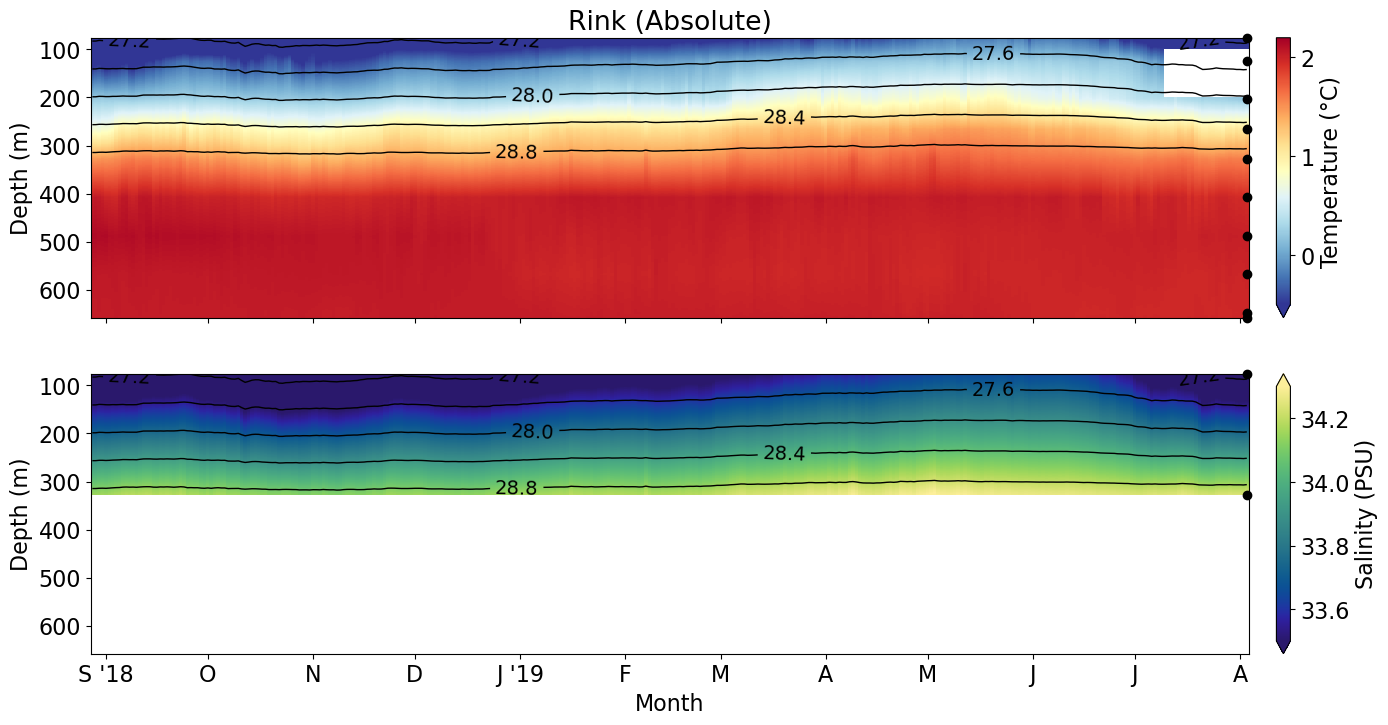

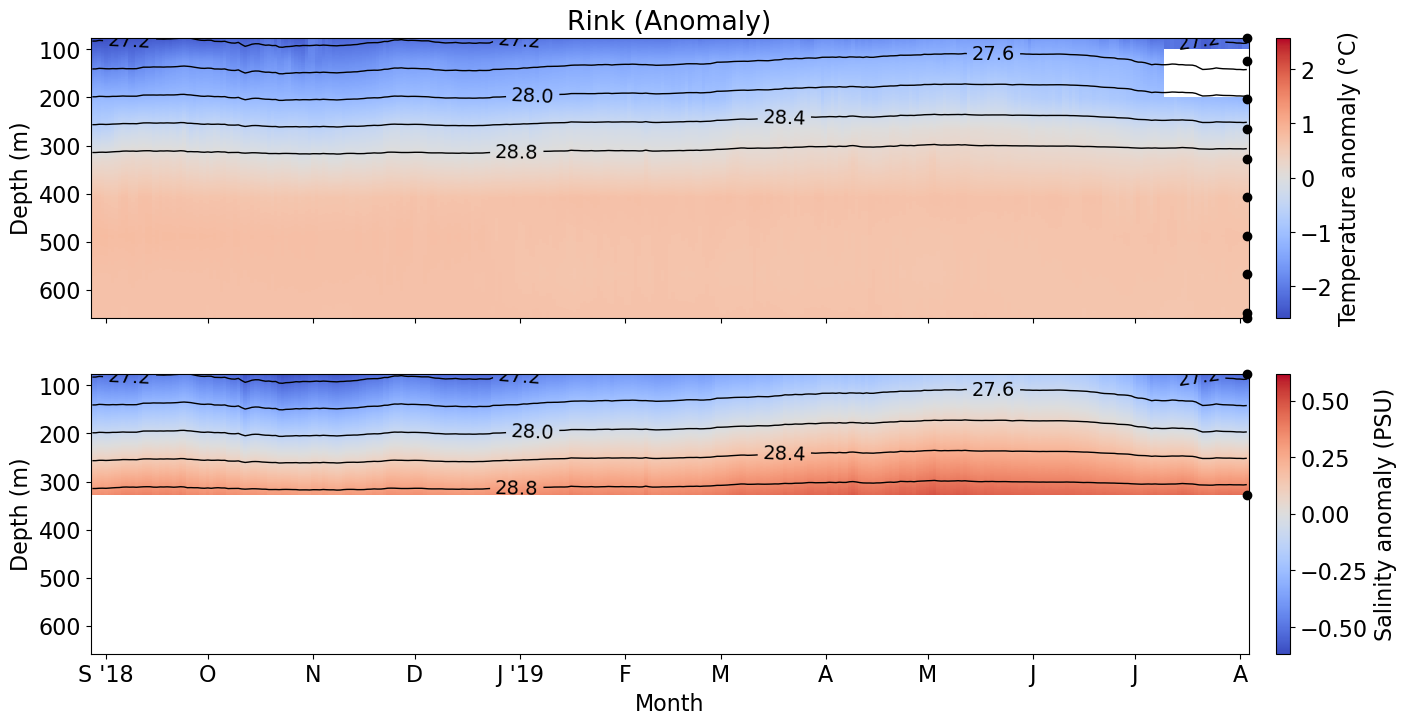

In [30]:
rink_temp_da_interp, rink_salt_da_interp, rink_sensor_depths_temp, rink_sensor_depths_salt = plot_mooring_profile(rink_ds, fjord_name='Rink')

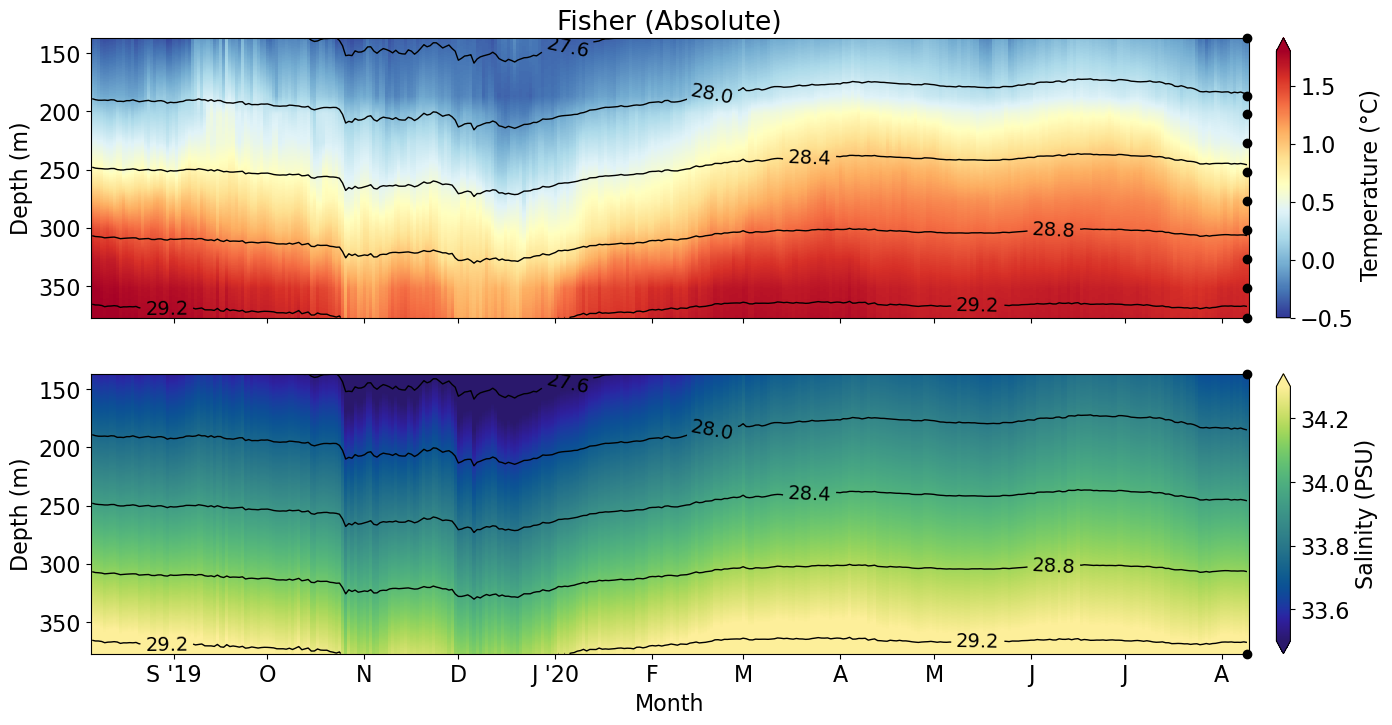

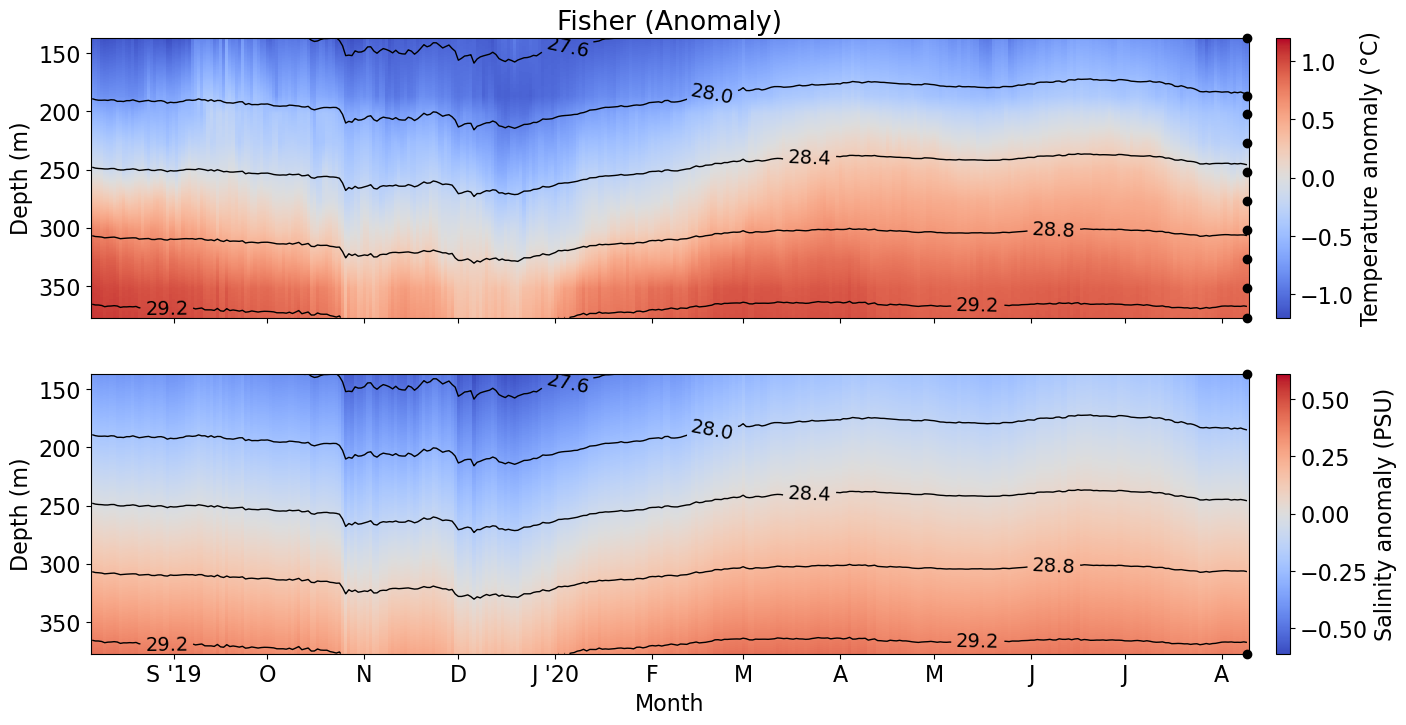

In [31]:
fisher_temp_da_interp, fisher_salt_da_interp, fisher_sensor_depths_temp, fisher_sensor_depths_salt = plot_mooring_profile(fisher_ds, fjord_name='Fisher')

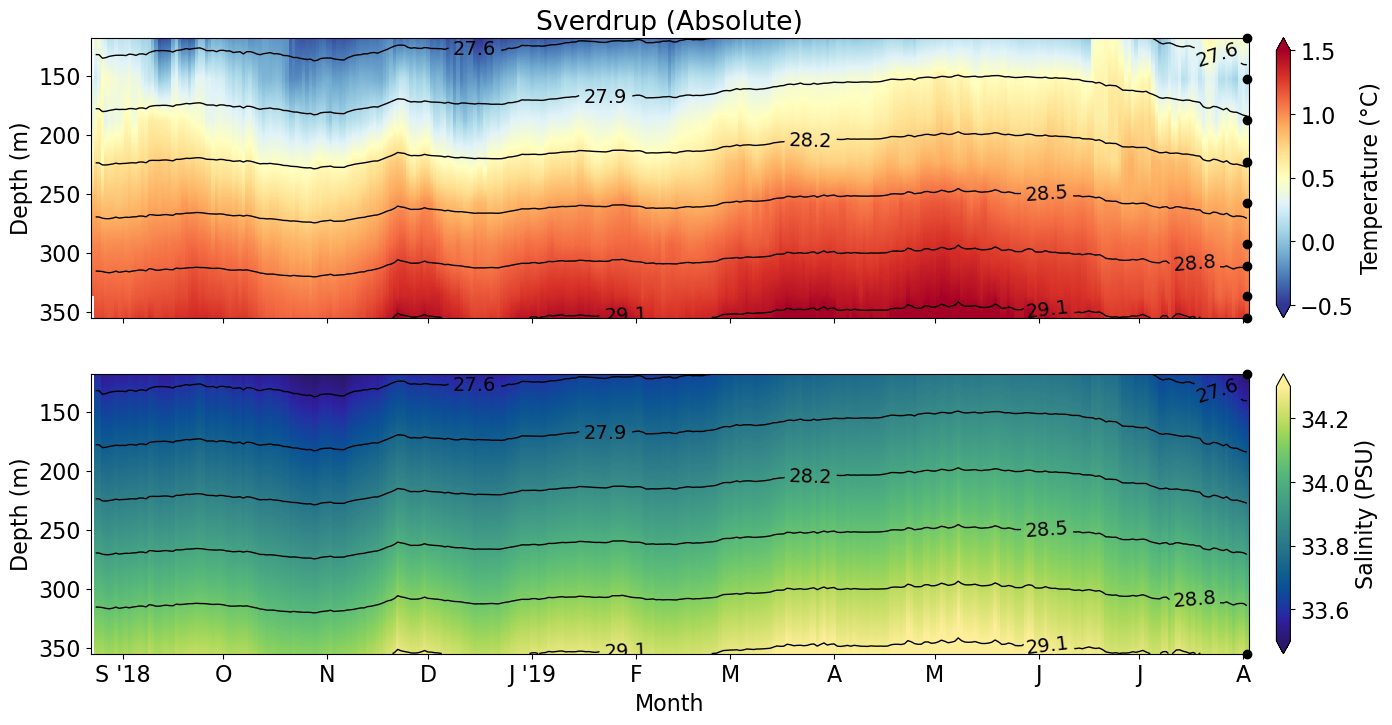

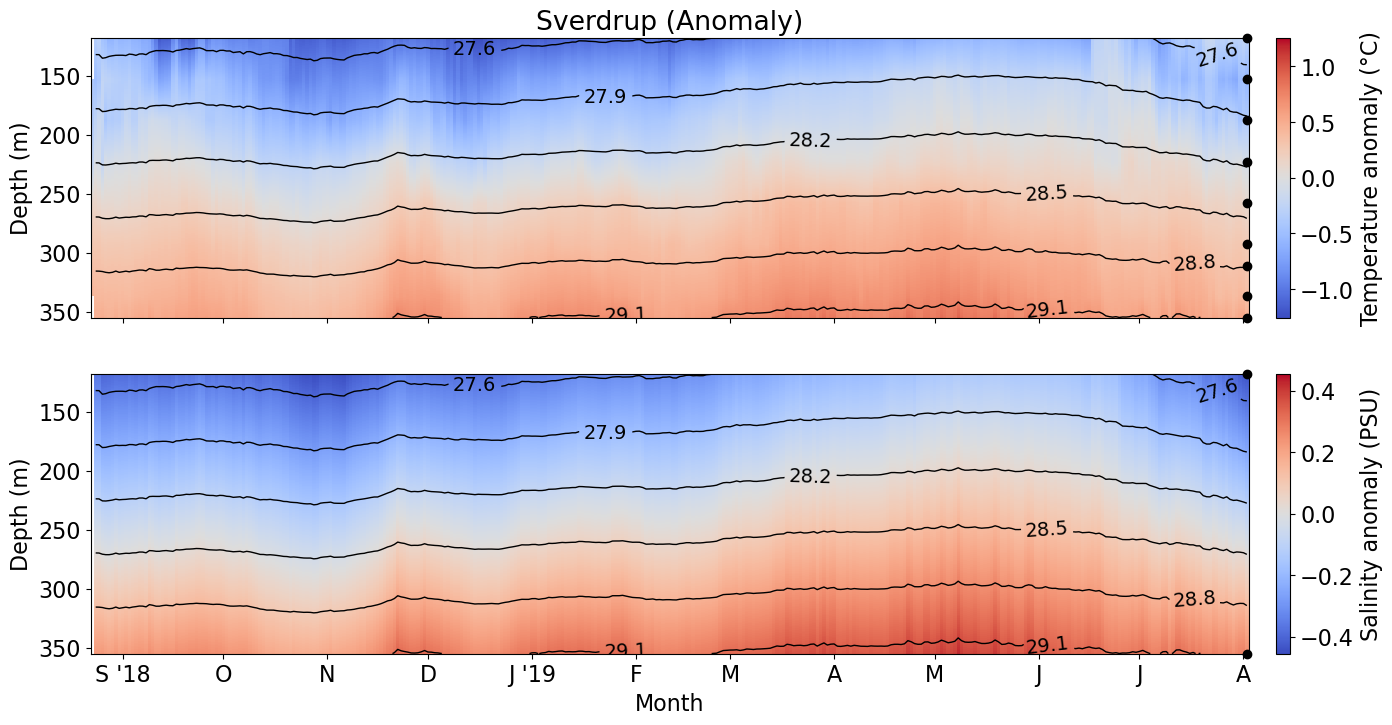

In [32]:
sverdrup_temp_da_interp, sverdrup_salt_da_interp, sverdrup_sensor_depths_temp, sverdrup_sensor_depths_salt = plot_mooring_profile(sverdrup_ds, fjord_name='Sverdrup')

### Extract and plot isotherm

In [83]:
all(rink_temp_da_interp.isel(time=0).values) != np.nan

True

In [86]:
tmp = np.array([np.nan, np.nan,np.nan,np.nan,np.nan])

In [95]:
len(np.unique(tmp))

1

In [88]:
np.all(tmp) == np.nan

False

In [96]:
def find_isotherm(array, isotherm_temp):
    isotherm = []
    for i in range(len(array.time.values)):
        if len(np.unique(array.isel(time=i).values))==1:
            iso_depth_tmp = np.nan
        else:
            idx = np.nanargmin((np.abs(array.isel(time=i).values - isotherm_temp)))
            iso_depth_tmp = array.isel(time=i).depth.values[idx]
        
        isotherm.append(iso_depth_tmp)
    return isotherm

In [97]:
rink_isotherm = find_isotherm(rink_temp_da_interp, 0.5)

In [107]:
ko_isotherm = find_isotherm(KO_temp_da_interp, 0.25)

In [99]:
sver_isotherm = find_isotherm(sverdrup_temp_da_interp, 0.5)

In [100]:
fisher_isotherm = find_isotherm(fisher_temp_da_interp, 0.5)

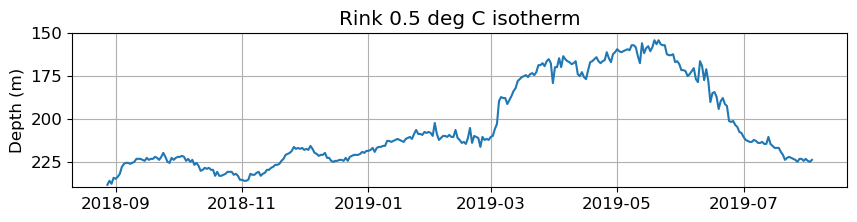

In [73]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = (10,2)
plt.plot(rink_temp_da_interp.time.values, rink_isotherm)
plt.ylim(240,150)
plt.ylabel("Depth (m)")
plt.grid()
plt.title("Rink 0.5 deg C isotherm");

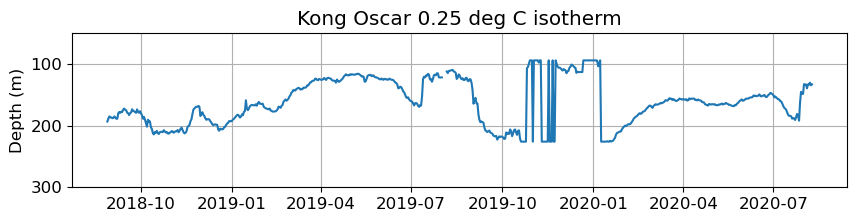

In [108]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = (10,2)
plt.plot(KO_temp_da_interp.time.values, ko_isotherm)
plt.ylim(300,50)
plt.ylabel("Depth (m)")
plt.grid()
plt.title("Kong Oscar 0.25 deg C isotherm");

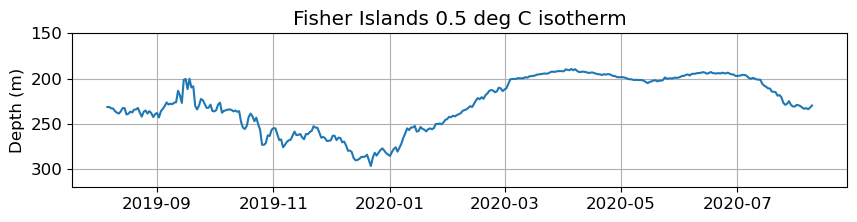

In [111]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = (10,2)
plt.plot(fisher_temp_da_interp.time.values, fisher_isotherm)
plt.ylim(320,150)
plt.ylabel("Depth (m)")
plt.grid()
plt.title("Fisher Islands 0.5 deg C isotherm");

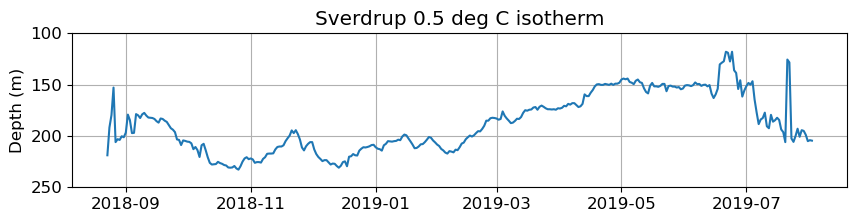

In [113]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = (10,2)
plt.plot(sverdrup_temp_da_interp.time.values, sver_isotherm)
plt.ylim(250,100)
plt.ylabel("Depth (m)")
plt.grid()
plt.title("Sverdrup 0.5 deg C isotherm");